## Recommendations for Microsoft's New Movie Studio

####  In this notebook we are going to analyze the relationship between the movie success and movie time of release,movie runtime, movie genre, directors, and actors/actresses. Success will be based on ROI and Profit margin.

#### First objective is to clean up the movie budget dataframe, then merge all the relevant data sets.

In [3]:

#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
import sqlite3 





In [4]:
!ls ..



Andrew_Boucher_Notebook.ipynb     dsc-phase1-project-template.ipynb
LICENSE                           notebook_development
README.md                         zippedData


In [5]:
!ls ../zippedData

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [6]:
conn = sqlite3.connect('../zippedData/im.db')

In [7]:
df_sql = pd.read_sql("""SELECT * FROM sqlite_master """, conn)
df_sql

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [8]:
run_time = pd.read_sql("""
select *
from movie_basics
""", conn)

In [9]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
run_time.dropna(subset=['genres'], inplace=True )

In [11]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [12]:
run_time.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [13]:
run_time['genres'].value_counts()[0:10]

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [14]:
genre_mean = run_time.groupby(by=['genres']).mean()


In [15]:
genre_mean.head(5)

,start_year,runtime_minutes
genres,,
Action,2015.032898,102.427580
"Action,Adult,Comedy",2014.000000,71.000000
"Action,Adventure",2015.096491,99.592593
"Action,Adventure,Animation",2015.096447,91.502890
"Action,Adventure,Biography",2015.176471,83.068966


In [16]:
keys = list(genre_mean.index)

In [17]:
values = list(genre_mean['runtime_minutes'].values)

In [18]:
new_dict = dict(zip(keys,values))
new_dict

{'Action': 102.4275802254987,
 'Action,Adult,Comedy': 71.0,
 'Action,Adventure': 99.5925925925926,
 'Action,Adventure,Animation': 91.5028901734104,
 'Action,Adventure,Biography': 83.06896551724138,
 'Action,Adventure,Comedy': 94.83388704318936,
 'Action,Adventure,Crime': 97.13636363636364,
 'Action,Adventure,Documentary': 61.851190476190474,
 'Action,Adventure,Drama': 104.27853881278538,
 'Action,Adventure,Family': 98.63333333333334,
 'Action,Adventure,Fantasy': 104.35398230088495,
 'Action,Adventure,History': 98.2,
 'Action,Adventure,Horror': 88.24193548387096,
 'Action,Adventure,Music': 89.66666666666667,
 'Action,Adventure,Musical': 97.0,
 'Action,Adventure,Mystery': 100.63636363636364,
 'Action,Adventure,Romance': 112.66666666666667,
 'Action,Adventure,Sci-Fi': 105.91911764705883,
 'Action,Adventure,Sport': 55.666666666666664,
 'Action,Adventure,Thriller': 104.94827586206897,
 'Action,Adventure,War': 80.71428571428571,
 'Action,Adventure,Western': 96.0,
 'Action,Animation': 93.2857

In [19]:
# impute .map run_time_min column to fill in nan with median of a specific genre  

run_time['run_time_mean'] = run_time['runtime_minutes'].fillna(run_time['genres'].map(new_dict))
run_time.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,122.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",96.999684
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",80.000000


In [20]:
run_time.dropna(subset=['run_time_mean'], inplace=True )

In [21]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28446
genres                 0
run_time_mean          0
dtype: int64

In [22]:
run_time.shape

(140679, 7)

In [23]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28446
genres                 0
run_time_mean          0
dtype: int64

In [24]:

funds = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz') 



In [25]:
funds.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
#copy df to work on, do not overwrite orignal 
numbers = funds.copy()



#funtion for cleaning
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df



#remove $ string
numbers = clean_a_money_column(numbers,'worldwide_gross')
numbers = clean_a_money_column(numbers,'domestic_gross')
numbers = clean_a_money_column(numbers,'production_budget')



# new column foreign_gross, Profit Margin, ROI
numbers['net_income'] = numbers['worldwide_gross'] - numbers['production_budget']
numbers['foreign_gross'] = numbers['worldwide_gross'] - numbers['domestic_gross']
numbers['Profit Margin'] = (numbers['net_income']*100)/numbers['worldwide_gross']
numbers.loc[numbers['Profit Margin'] == float('-inf'), 'Profit Margin'] = 0
numbers['ROI'] = (numbers['net_income']) / numbers['production_budget'] * 100



# new columns month and year 
numbers['Year'] = pd.to_numeric(numbers['release_date'].map(lambda x: x[-4:]))
numbers['Month'] = numbers['release_date'].map(lambda x: x[:3])



#check for dupes
movie_dupes = pd.Series(numbers['movie'].value_counts())
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
numbers[numbers['movie'].isin(title_dupes)]

numbers.head(3)
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   net_income         5782 non-null   int64  
 7   foreign_gross      5782 non-null   int64  
 8   Profit Margin      5782 non-null   float64
 9   ROI                5782 non-null   float64
 10  Year               5782 non-null   int64  
 11  Month              5782 non-null   object 
dtypes: float64(2), int64(7), object(3)
memory usage: 542.2+ KB


In [27]:
movies_2000 = numbers.loc[numbers['Year'] >= 2000]  
movies_2000

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095,76.436443,324.384139,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365,75.925058,315.369636,2017,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,0,-677.777778,-87.142857,2004,Dec
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0,0.000000,-100.000000,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,0,-273.692078,-73.240000,2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0,0.000000,-100.000000,2015,Sep


In [28]:
movie_dupes = pd.Series(movies_2000['movie'].value_counts())
movie_dupes

Home                  3
Brothers              2
Fantastic Four        2
The Gift              2
Death at a Funeral    2
                     ..
Getaway               1
The Lovely Bones      1
Grace Unplugged       1
Stardust              1
Sherlock Gnomes       1
Name: movie, Length: 4364, dtype: int64

In [29]:
king_kong = numbers.loc[movies_2000['movie'] == 'King Kong']  
king_kong


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
title_dupes[0:5]

In [ ]:
movies_2000[movies_2000['movie'].isin(title_dupes)]


# Genre Data Exploration 

In [34]:
run_time['genres'].map(lambda x: x.split(','))

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146137           [Drama, Thriller]
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146143               [Documentary]
Name: genres, Length: 140679, dtype: object

In [35]:
run_time['genres_list'] = run_time['genres'].str.split(',')

In [36]:
run_time.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,122.000000,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",96.999684,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",80.000000,"[Comedy, Drama, Fantasy]"


In [37]:
single_genres = run_time.explode('genres_list')
single_genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.0,Drama


In [ ]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)


# green dots/line will be ww gross as a function of production_budget
ax1 = sns.regplot(data=numbers, x='production_budget',
                 y='worldwide_gross', color='green',marker='*', label='worldwide_gross')

# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='foreign_gross', color='blue',marker='o', label='foreign_gross')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='domestic_gross', color='red',marker='^', label='domestic_gross')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)

In [32]:
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095,76.436443,324.384139,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365,75.925058,315.369636,2017,Dec


In [38]:
single_genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.0,Drama


In [39]:
num_genre_join = numbers.merge(single_genres, left_on='movie', right_on='primary_title')
num_genre_join.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec,tt1775309,Avatar,Abatâ,2011,93.0,Horror,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",136.0,Action
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",136.0,Adventure
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",136.0,Fantasy
4,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",113.0,Action


In [42]:
genre_list = list(num_genre_join['genres_list'].unique())
genre_list

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'History',
 'Documentary',
 'Musical',
 'Romance',
 'Mystery',
 'Biography',
 'Sport',
 'War',
 'News',
 'Music',
 'Reality-TV']

In [46]:
num_genre_group_mean_WWG = num_genre_join.groupby('genres_list')['worldwide_gross'].mean()
num_genre_group_mean_WWG.head()

genres_list
Action       1.761956e+08
Adventure    2.823146e+08
Animation    3.031047e+08
Biography    6.841410e+07
Comedy       1.023114e+08
Name: worldwide_gross, dtype: float64

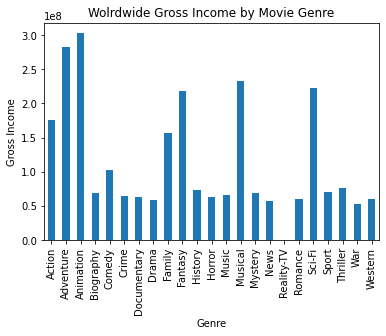

In [50]:
num_genre_group_mean_WWG.plot(kind='bar', title ='Wolrdwide Gross Income by Movie Genre', ylabel='Gross Income', xlabel='Genre');

In [45]:
num_genre_group_median = num_genre_join.groupby('genres_list').median()
num_genre_group_median.head()

,id,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,start_year,runtime_minutes,run_time_mean
genres_list,,,,,,,,,,,,
Action,50.0,38000000.0,32754514.0,73249137.5,27548508.5,34657447.0,42.278494,73.245654,2013.0,2014.0,107.0,106.00000
Adventure,48.0,73621553.0,58243820.5,150977672.0,65979147.5,85523894.0,56.391856,129.316965,2014.0,2014.0,104.0,103.00000
Animation,46.5,75000000.0,83295507.0,197541672.0,125232011.5,107883316.0,64.200283,179.331814,2014.0,2015.0,93.0,92.00000
Biography,54.5,18000000.0,14221212.5,25440122.5,6254008.0,8241985.0,37.126809,59.080985,2014.0,2014.0,108.0,108.00000
Comedy,52.0,20000000.0,23388906.0,39044790.5,15223306.5,13083952.0,46.240603,86.014009,2013.0,2014.0,99.0,97.89042
